In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
covid_data_set = pd.read_csv("COVID_Dataset.csv")
covid_data_set.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [111]:
covid_data_set.describe()

,New Deaths
count,7.000000
mean,15.857143
std,16.647608
min,1.000000
25%,2.000000
50%,6.000000
75%,31.500000
max,37.000000


In [112]:
covid_data_set.drop(['New Cases' ,'New Deaths' ,'New Recovered' ],axis=1).head()
# covid_data_set.drop(0,axis=0).head()




,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209","1,199,031","109,053,249","1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429","533,475",NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560","167,642","39,970,918",0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284","182,439","38,240,600","396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327","709,765","36,249,161","1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


/var/folders/sq/qqsftq8d3f36836rzvr6prhw0000gn/T/ipykernel_28136/552465751.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(covid_data_set['Deaths/1M pop']).plot()


<Axes: xlabel='Deaths/1M pop'>

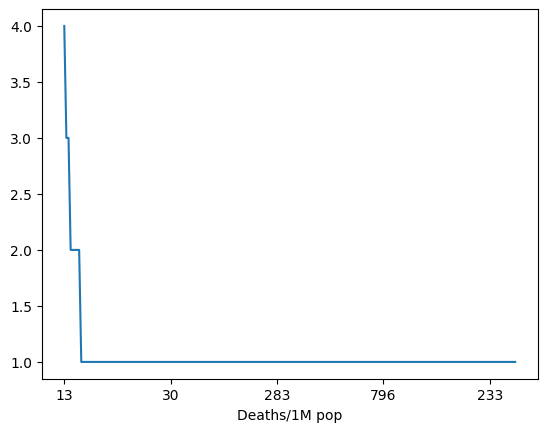

In [113]:
pd.value_counts(covid_data_set['Deaths/1M pop']).plot()

In [114]:
covid_data_set.index

RangeIndex(start=0, stop=239, step=1)

<Axes: ylabel='Active Cases'>

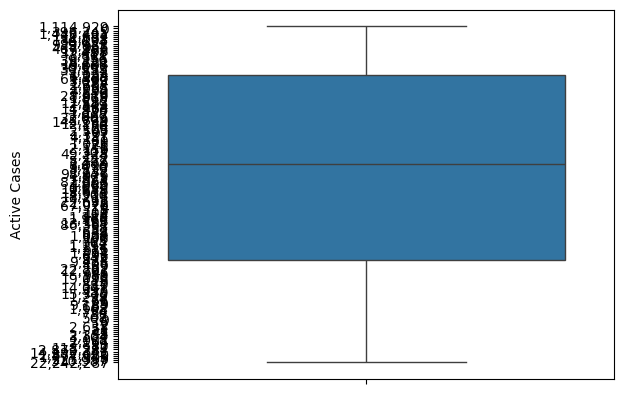

In [115]:
sns.boxplot(covid_data_set['Active Cases'])

<Axes: ylabel='Count'>

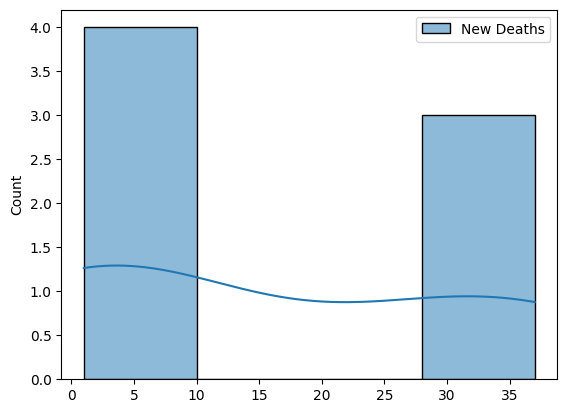

In [116]:
sns.histplot(covid_data_set , kde=True , color='lightgreen')

In [117]:
covid_data_set['Active Cases'].value_counts()

Active Cases
0             26
2              4
26             3
70             2
97             2
              ..
1,026          1
-1             1
2,116          1
159            1
22,242,287     1
Name: count, Length: 157, dtype: int64

     Country  Total Cases  New Cases Total Deaths  New Deaths Total Recovered  \
3    Germany   38,819,284      574.0      182,439        28.0      38,240,600   
233   Total:  253,186,231      940.0    2,100,109        35.0     248,509,042   

    New Recovered Active Cases Serious, Critical Tot Cases/1M pop  \
3             NaN      396,245               NaN          462,776   
233         2,477    2,577,080             4,521              NaN   

    Deaths/1M pop  Total Tests Tests/1M pop  Population  
3           2,175  122,332,384    1,458,359  83,883,596  
233           NaN          NaN          NaN         NaN  


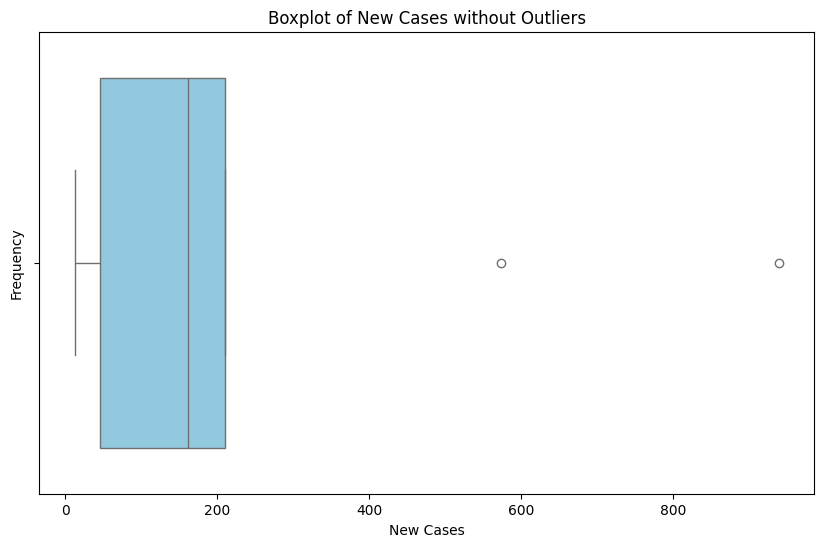

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
covid_data_set = pd.read_csv("COVID_Dataset.csv")

# Convert 'New Cases' column to numeric values
covid_data_set['New Cases'] = pd.to_numeric(covid_data_set['New Cases'], errors='coerce')

# Drop rows with missing or non-numeric values in 'New Cases' column
covid_data_set.dropna(subset=['New Cases'], inplace=True)

# Calculate IQR
Q1 = covid_data_set['New Cases'].quantile(0.25)
Q3 = covid_data_set['New Cases'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = covid_data_set[(covid_data_set['New Cases'] < lower_bound) | (covid_data_set['New Cases'] > upper_bound)]
print(outliers_iqr.head())
# Plot boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='New Cases', data=covid_data_set, color='skyblue')
plt.title('Boxplot of New Cases without Outliers')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()
